In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller, acf, pacf
#from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from datetime import timedelta

# Revision de datos

In [2]:
df_Coronavirus =  pd.read_csv('casos totales.csv')
df_Coronavirus.head()

,Fecha,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,...,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25
0,Casos nuevos,0,2,1,1,2,3,5,2,6,...,534,445,478,358,419,325,464,516,494,552
1,Casos totales,1,3,4,5,7,10,15,17,23,...,8807,9252,9730,10088,10507,10832,11296,11812,12306,12858
2,Casos recuperados,0,0,0,0,0,0,0,0,0,...,3299,3621,4035,4338,4676,4969,5386,5804,6327,6746
3,Fallecidos,0,0,0,0,0,0,0,0,0,...,105,116,126,133,139,147,160,168,174,181
4,Casos activos,1,3,4,5,7,10,15,17,23,...,5403,5515,5569,5617,5692,5716,5750,5840,5805,5931


Para facilitar el trabajo, obtengo la traspuesta, para dejar las fechas como filas

In [3]:
df_Coronavirus_T = df_Coronavirus.T
df_Coronavirus_T = df_Coronavirus_T.reset_index()
df_Coronavirus_T.head() 

,index,0,1,2,3,4
0,Fecha,Casos nuevos,Casos totales,Casos recuperados,Fallecidos,Casos activos
1,2020-03-03,0,1,0,0,1
2,2020-03-04,2,3,0,0,3
3,2020-03-05,1,4,0,0,4
4,2020-03-06,1,5,0,0,5


Arreglamos nuestro nuevo df

In [4]:
df_Coronavirus_T.columns = ['Fecha', 'Casos nuevos', 'Casos totales', 'Casos recuperados', 'Fallecidos', 'Casos activos']
df_Coronavirus_T = df_Coronavirus_T.drop([0], axis = 0)
df_Coronavirus_T.head()

,Fecha,Casos nuevos,Casos totales,Casos recuperados,Fallecidos,Casos activos
1,2020-03-03,0,1,0,0,1
2,2020-03-04,2,3,0,0,3
3,2020-03-05,1,4,0,0,4
4,2020-03-06,1,5,0,0,5
5,2020-03-07,2,7,0,0,7


Arreglamos el index

In [5]:
df_Coronavirus_T = df_Coronavirus_T.set_index('Fecha')
df_Coronavirus_T.head()

,Casos nuevos,Casos totales,Casos recuperados,Fallecidos,Casos activos
Fecha,,,,,
2020-03-03,0,1,0,0,1
2020-03-04,2,3,0,0,3
2020-03-05,1,4,0,0,4
2020-03-06,1,5,0,0,5
2020-03-07,2,7,0,0,7


In [6]:
df_Coronavirus_T.index

Index(['2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07',
       '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
       '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22',
       '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
       '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
       '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06',
       '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11',
       '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16',
       '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
       '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25'],
      dtype='object', name='Fecha')

Los index son solo del tipo object, es mejor dejarlos como de tipo fecha

In [7]:
df_Coronavirus_T.index = pd.to_datetime(df_Coronavirus_T.index, format = '%Y/%m/%d')
df_Coronavirus_T.index

DatetimeIndex(['2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
               '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10',
               '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
               '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18',
               '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22',
               '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
               '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30',
               '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03',
               '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07',
               '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11',
               '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15',
               '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19',
               '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23',
               '2020-04-24', '2020-04-25'],
              dtype='datetime64[n

Listo!

In [8]:
df_Coronavirus_T.shape

(54, 5)

In [9]:
df_Coronavirus_T.isnull().sum()

Casos nuevos         0
Casos totales        0
Casos recuperados    0
Fallecidos           0
Casos activos        0
dtype: int64

In [10]:
df_Coronavirus_T

,Casos nuevos,Casos totales,Casos recuperados,Fallecidos,Casos activos
Fecha,,,,,
2020-03-03,0,1,0,0,1
2020-03-04,2,3,0,0,3
2020-03-05,1,4,0,0,4
2020-03-06,1,5,0,0,5
2020-03-07,2,7,0,0,7
2020-03-08,3,10,0,0,10
2020-03-09,5,15,0,0,15
2020-03-10,2,17,0,0,17
2020-03-11,6,23,0,0,23


# Estadísticas y gráficas

Graficamos la curva de casos totales

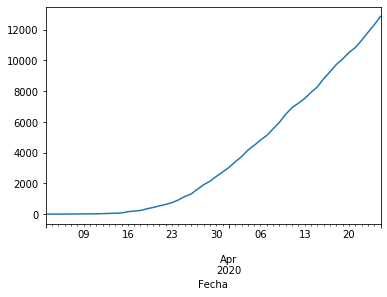

In [11]:
df_Coronavirus_T['Casos totales'].plot()

Obtenemos la media y desviación estándar móvil para graficarlas junto con la curva de casos totales. Usaremos una ventana de 5 días

In [12]:
rolling_mean = df_Coronavirus_T['Casos totales'].rolling(5).mean()
rolling_std = df_Coronavirus_T['Casos totales'].rolling(5).std()

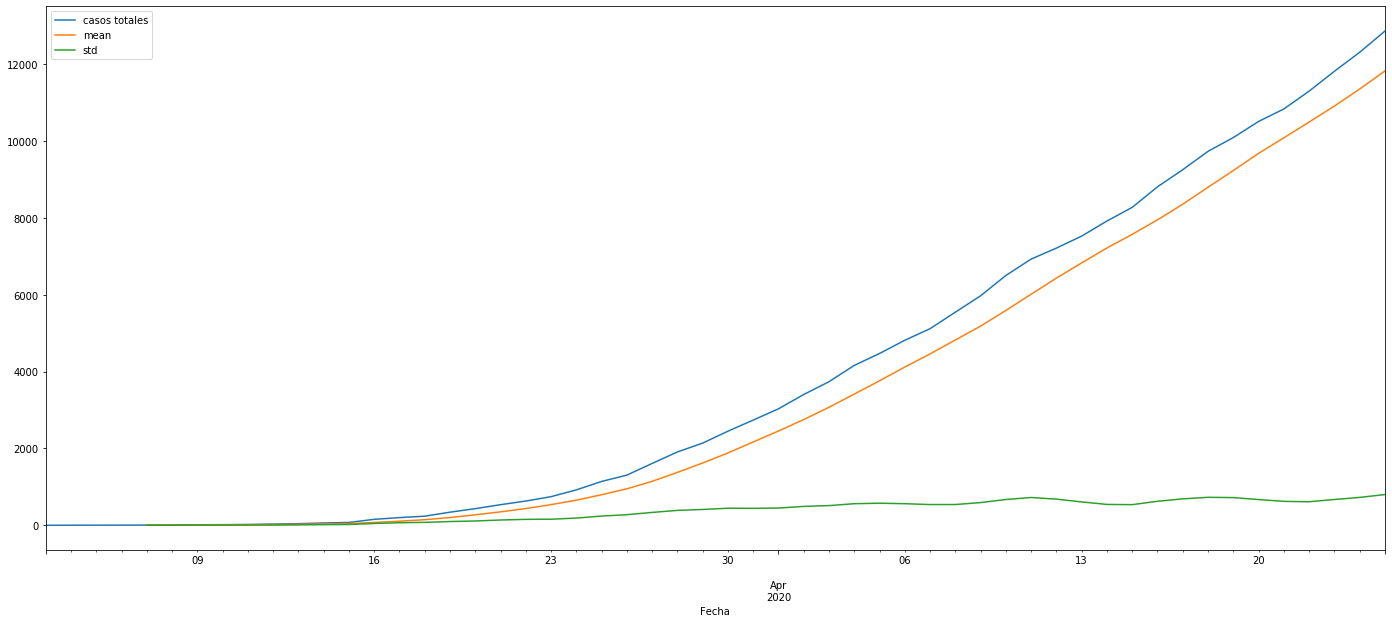

In [13]:
plt.figure(figsize = (24, 10))
df_Coronavirus_T['Casos totales'].plot(label = 'casos totales')
rolling_mean.plot(label = 'mean')
rolling_std.plot(label = 'std')
plt.legend()

Test Adfuller

In [14]:
df_adftest = adfuller(df_Coronavirus_T['Casos totales'], autolag = 'AIC')
df_adftest = pd.DataFrame({'Test estadístico': [df_adftest[0]], 'P-Value': [df_adftest[1]], 'usedlag': [df_adftest[2]]})
df_adftest

,Test estadístico,P-Value,usedlag
0,-0.853547,0.802885,6


P-Value es mayor que que 0.05, y las graficas anteriores demuestran lo obvio: la función no es estacionaria (muy claramente), por lo que se necesitará diferenciación (d>0)

Ploteando ACF y PACF

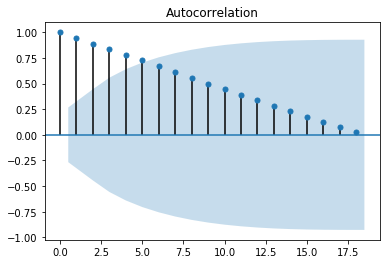

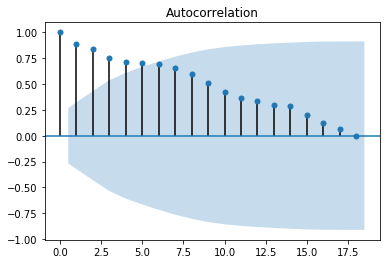

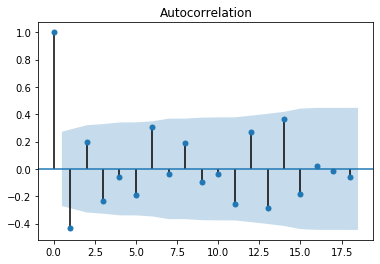

In [15]:
plot_acf(df_Coronavirus_T['Casos totales'].astype(float))
plot_acf(df_Coronavirus_T['Casos totales'].diff().dropna().astype(float))
plot_acf(df_Coronavirus_T['Casos totales'].diff().diff().dropna().astype(float))
plt.show()

La serie se hace estacionaria en la segunda diferenciación, por lo que d = 2, donde el primer lag toma relevancia, q = 1

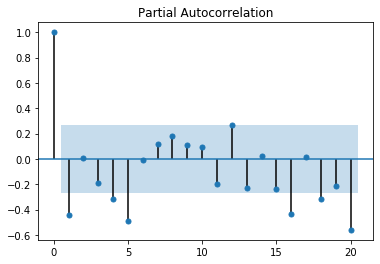

In [16]:
plot_pacf(df_Coronavirus_T['Casos totales'].diff().diff().dropna(), lags = 20)
plt.show()

Al usar la segunda diferenciación para plotear PACF, se observa que el primer lag tiene una gran relevancia, por lo que p = 1

# Modelando 

In [17]:
modelo = sm.tsa.ARIMA(df_Coronavirus_T['Casos totales'].astype(float), order=(1,2,1))
modelo_fit = modelo.fit(disp = -1)

C:\Users\gerso\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\gerso\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [18]:
forecast = modelo_fit.forecast(7)
forecast_serie = pd.Series(forecast[0])
forecast_serie

0    13388.911047
1    13922.089732
2    14463.560004
3    15014.875511
4    15576.436958
5    16148.347691
6    16730.634366
dtype: float64

In [19]:
lastIndex = df_Coronavirus_T.index[len(df_Coronavirus_T.index) - 1]
day = 1
dateForIndex = []
for day in range(7):
    day = day + 1
    dateForIndex.append(lastIndex + timedelta(days= day))
dateForIndex
lastIndex
forecast_serie.index = dateForIndex
forecast_serie.index

DatetimeIndex(['2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29',
               '2020-04-30', '2020-05-01', '2020-05-02'],
              dtype='datetime64[ns]', freq=None)

In [20]:
forecast_serie

2020-04-26    13388.911047
2020-04-27    13922.089732
2020-04-28    14463.560004
2020-04-29    15014.875511
2020-04-30    15576.436958
2020-05-01    16148.347691
2020-05-02    16730.634366
dtype: float64

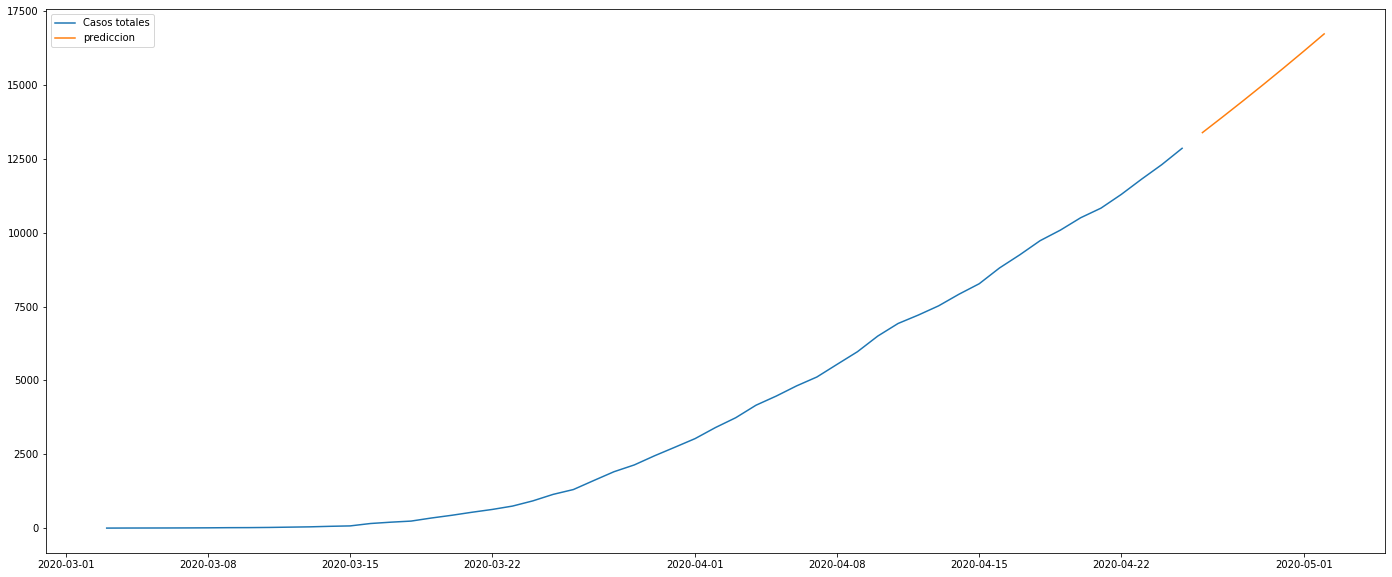

In [21]:
plt.figure(figsize = (24, 10))
plt.plot(df_Coronavirus_T['Casos totales'], label = 'Casos totales')
plt.plot(forecast_serie, label = 'prediccion')
#plt.xlim('2020-04-15', '2020-04-20')
plt.plot()
plt.legend()

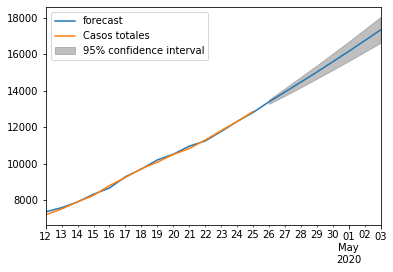

In [22]:
fig = modelo_fit.plot_predict(40, 61)

In [23]:
modelo_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:       D2.Casos totales   No. Observations:                   52
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -285.614
Method:                       css-mle   S.D. of innovations             58.380
Date:                Sat, 25 Apr 2020   AIC                            579.229
Time:                        15:03:39   BIC                            587.034
Sample:                    03-05-2020   HQIC                           582.221
                         - 04-25-2020                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     10.3852      2.227      4.662      0.000       6.019      14.751
ar.L1.D2.Casos totales     0.2579      0.229      1.124      0.266      -0.192       0.708
ma.L1.D2.Casos totales    -0.8162      0.163     -4.997      0.000      -1.136      -0.496
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.8773           +0.0000j            3.8773            0.0000
MA.1            1.2253           +0.0000j            1.2253            0.0000
-----------------------------------------------------------------------------
"""